In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.io import fits
from astropy.table import Table, join, vstack
from astropy.coordinates import SkyCoord

from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import glob
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical

In [2]:
#USANDO csv
catalogo = os.path.join('/home/sofia/Documentos/Pantheon/', 'Pantheon-SH0ES.csv')

In [3]:
catalogo_tabela = Table.read(catalogo)

LETRA A

In [4]:
zdata = catalogo_tabela['zCMB']
zedata = catalogo_tabela['zCMBERR']

mudata = catalogo_tabela['MU_SH0ES']
muedata = catalogo_tabela['MU_SH0ES_ERR_DIAG']

radata = catalogo_tabela['RA']
decdata = catalogo_tabela['DEC']

In [10]:
#Distância
exp = (mudata-25)/5
dist = np.power(10, exp)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
v = c*zdata

In [6]:
def f(z, H0):
    c = const.c.decompose().to('km/s').value
    return (c*z)/H0

In [7]:
curve, cove = curve_fit(f, zdata, dist, method='trf')
cov = np.array(np.sqrt(np.diag(cove)))

In [8]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0 = np.around(curve[0], 2)
H0_err = float(np.around(cov[0], 2))

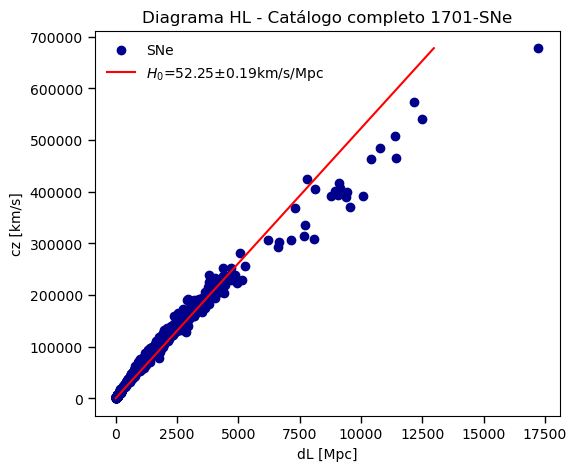

In [14]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(dist, v, label='SNe', color='darkblue')
plt.plot(f(zdata, curve[0]), v, color='red', label='$H_{0}$='+str(H0)+'$\pm$'+str(H0_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo completo 1701-SNe')
#plt.savefig('/home/eduarda/Documentos/Fermi/FULL/hist_fluence_fermi_map.pdf', bbox_inches='tight', dpi=600)
plt.show()

LETRA B

In [15]:
coord = SkyCoord(ra=radata, dec=decdata, frame='icrs', unit='deg')
coordenadas = coord.galactic

l = (coordenadas.l.deg)*np.pi/180
b = (coordenadas.b.deg)*np.pi/180

In [16]:
l[l > np.pi] = l[l > np.pi] - 2*np.pi
l[l < np.pi] = l[l < np.pi]*(-1)

In [17]:
catalogo_tabela['l'] = l
catalogo_tabela['b'] = b

In [18]:
dataN = catalogo_tabela[(catalogo_tabela['b']>=0)]

In [20]:
len(dataN)

664

In [19]:
dataS = catalogo_tabela[(catalogo_tabela['b']<=0)]

In [21]:
len(dataS)

1037

In [22]:
dataN1 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.06)]
dataN2 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.1)]
dataN3 = dataN[(dataN['zCMB']>=0.001)&(dataN['zCMB']<=0.2)]
dataN4 = dataN[(dataN['zCMB']>=0.01)&(dataN['zCMB']<=0.06)]
dataN5 = dataN[(dataN['zCMB']>=0.015)&(dataN['zCMB']<=0.065)]
dataN6 = dataN[(dataN['zCMB']>=0.01)&(dataN['zCMB']<=0.1)]
dataN7 = dataN[(dataN['zCMB']>=0.02)&(dataN['zCMB']<=0.1)]

In [31]:
zdataN1 = dataN1['zCMB']
zedataN1 = dataN1['zCMBERR']

mudataN1 = dataN1['MU_SH0ES']
muedataN1 = dataN1['MU_SH0ES_ERR_DIAG']

radataN1 = dataN1['RA']
decdataN1 = dataN1['DEC']

In [43]:
#Distância
expN1 = (mudataN1-25)/5
distN1 = np.power(10, expN1)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN1 = c*zdataN1

In [44]:
curveN1, coveN1 = curve_fit(f, zdataN1, distN1, method='trf')
covN1 = np.array(np.sqrt(np.diag(coveN1)))

In [45]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N1 = np.around(curveN1[0], 2)
H0N1_err = float(np.around(covN1[0], 2))

In [46]:
len(dataN1)

380

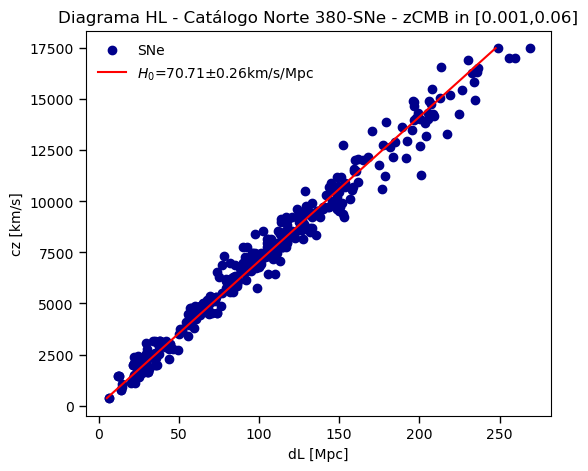

In [47]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN1, vN1, label='SNe', color='darkblue')
plt.plot(f(zdataN1, curveN1[0]), vN1, color='red', label='$H_{0}$='+str(H0N1)+'$\pm$'+str(H0N1_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 380-SNe - zCMB in [0.001,0.06]')
plt.show()

In [32]:
zdataN2 = dataN2['zCMB']
zedataN2 = dataN2['zCMBERR']

mudataN2 = dataN2['MU_SH0ES']
muedataN2 = dataN2['MU_SH0ES_ERR_DIAG']

radataN2 = dataN2['RA']
decdataN2 = dataN2['DEC']

In [48]:
#Distância
expN2 = (mudataN2-25)/5
distN2 = np.power(10, expN2)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN2 = c*zdataN2

In [49]:
curveN2, coveN2 = curve_fit(f, zdataN2, distN2, method='trf')
covN2 = np.array(np.sqrt(np.diag(coveN2)))

In [50]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N2 = np.around(curveN2[0], 2)
H0N2_err = float(np.around(covN2[0], 2))

In [51]:
len(dataN2)

412

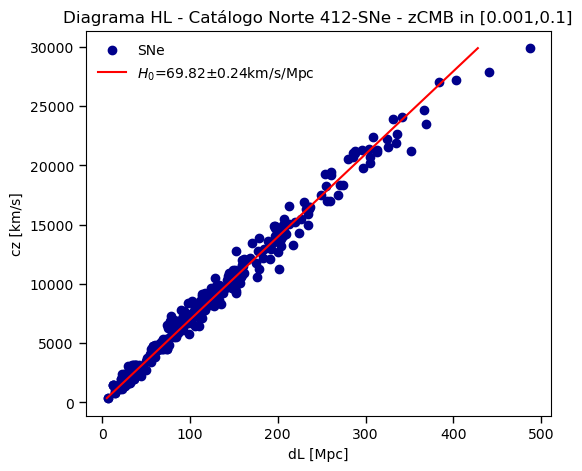

In [52]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN2, vN2, label='SNe', color='darkblue')
plt.plot(f(zdataN2, curveN2[0]), vN2, color='red', label='$H_{0}$='+str(H0N2)+'$\pm$'+str(H0N2_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 412-SNe - zCMB in [0.001,0.1]')
plt.show()

In [33]:
zdataN3 = dataN3['zCMB']
zedataN3 = dataN3['zCMBERR']

mudataN3 = dataN3['MU_SH0ES']
muedataN3 = dataN3['MU_SH0ES_ERR_DIAG']

radataN3 = dataN3['RA']
decdataN3 = dataN3['DEC']

In [53]:
#Distância
expN3 = (mudataN3-25)/5
distN3 = np.power(10, expN3)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN3 = c*zdataN3

In [54]:
curveN3, coveN3 = curve_fit(f, zdataN3, distN3, method='trf')
covN3 = np.array(np.sqrt(np.diag(coveN3)))

In [55]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N3 = np.around(curveN3[0], 2)
H0N3_err = float(np.around(covN3[0], 2))

In [56]:
len(dataN3)

438

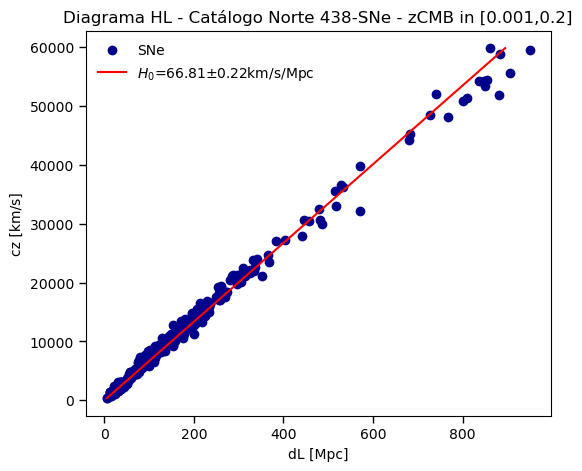

In [57]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN3, vN3, label='SNe', color='darkblue')
plt.plot(f(zdataN3, curveN3[0]), vN3, color='red', label='$H_{0}$='+str(H0N3)+'$\pm$'+str(H0N3_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 438-SNe - zCMB in [0.001,0.2]')
plt.show()

In [34]:
zdataN4 = dataN4['zCMB']
zedataN4 = dataN4['zCMBERR']

mudataN4 = dataN4['MU_SH0ES']
muedataN4 = dataN4['MU_SH0ES_ERR_DIAG']

radataN4 = dataN4['RA']
decdataN4 = dataN4['DEC']

In [58]:
#Distância
expN4 = (mudataN4-25)/5
distN4 = np.power(10, expN4)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN4 = c*zdataN4

In [59]:
curveN4, coveN4 = curve_fit(f, zdataN4, distN4, method='trf')
covN4 = np.array(np.sqrt(np.diag(coveN4)))

In [60]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N4 = np.around(curveN4[0], 2)
H0N4_err = float(np.around(covN4[0], 2))

In [61]:
len(dataN4)

305

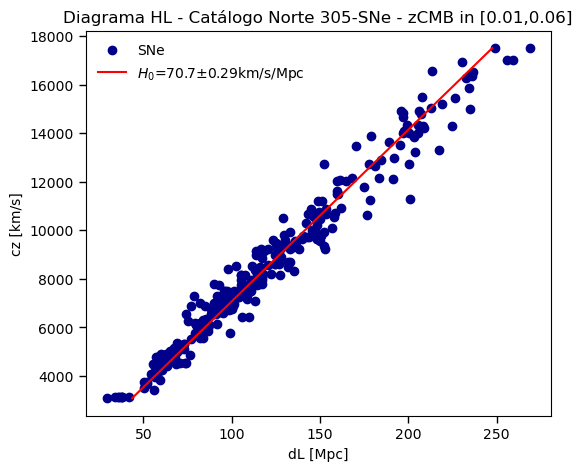

In [62]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN4, vN4, label='SNe', color='darkblue')
plt.plot(f(zdataN4, curveN4[0]), vN4, color='red', label='$H_{0}$='+str(H0N4)+'$\pm$'+str(H0N4_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 305-SNe - zCMB in [0.01,0.06]')
plt.show()

In [35]:
zdataN5 = dataN5['zCMB']
zedataN5 = dataN5['zCMBERR']

mudataN5 = dataN5['MU_SH0ES']
muedataN5 = dataN5['MU_SH0ES_ERR_DIAG']

radataN5 = dataN5['RA']
decdataN5 = dataN5['DEC']

In [63]:
#Distância
expN5 = (mudataN5-25)/5
distN5 = np.power(10, expN5)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN5 = c*zdataN5

In [64]:
curveN5, coveN5 = curve_fit(f, zdataN5, distN5, method='trf')
covN5 = np.array(np.sqrt(np.diag(coveN5)))

In [65]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N5 = np.around(curveN5[0], 2)
H0N5_err = float(np.around(covN5[0], 2))

In [66]:
len(dataN5)

284

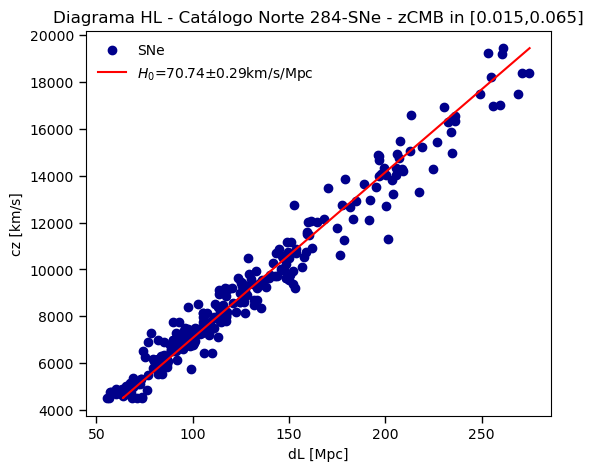

In [67]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN5, vN5, label='SNe', color='darkblue')
plt.plot(f(zdataN5, curveN5[0]), vN5, color='red', label='$H_{0}$='+str(H0N5)+'$\pm$'+str(H0N5_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 284-SNe - zCMB in [0.015,0.065]')
plt.show()

In [36]:
zdataN6 = dataN6['zCMB']
zedataN6 = dataN6['zCMBERR']

mudataN6 = dataN6['MU_SH0ES']
muedataN6 = dataN6['MU_SH0ES_ERR_DIAG']

radataN6 = dataN6['RA']
decdataN6 = dataN6['DEC']

In [68]:
#Distância
expN6 = (mudataN6-25)/5
distN6 = np.power(10, expN6)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN6 = c*zdataN6

In [70]:
curveN6, coveN6 = curve_fit(f, zdataN6, distN6, method='trf')
covN6 = np.array(np.sqrt(np.diag(coveN6)))

In [72]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N6 = np.around(curveN6[0], 2)
H0N6_err = float(np.around(covN6[0], 2))

In [73]:
len(dataN6)

337

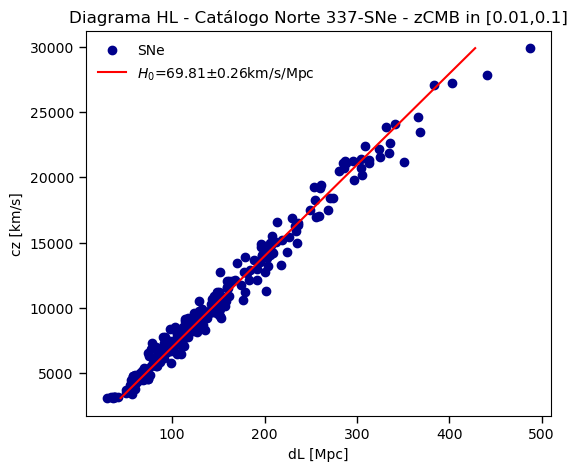

In [76]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN6, vN6, label='SNe', color='darkblue')
plt.plot(f(zdataN6, curveN6[0]), vN6, color='red', label='$H_{0}$='+str(H0N6)+'$\pm$'+str(H0N6_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 337-SNe - zCMB in [0.01,0.1]')
plt.show()

In [37]:
zdataN7 = dataN7['zCMB']
zedataN7 = dataN7['zCMBERR']

mudataN7 = dataN7['MU_SH0ES']
muedataN7 = dataN7['MU_SH0ES_ERR_DIAG']

radataN7 = dataN7['RA']
decdataN7 = dataN7['DEC']

In [69]:
#Distância
expN7 = (mudataN7-25)/5
distN7 = np.power(10, expN7)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vN7 = c*zdataN7

In [71]:
curveN7, coveN7 = curve_fit(f, zdataN7, distN7, method='trf')
covN7 = np.array(np.sqrt(np.diag(coveN7)))

In [74]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0N7 = np.around(curveN7[0], 2)
H0N7_err = float(np.around(covN7[0], 2))

In [75]:
len(dataN7)

273

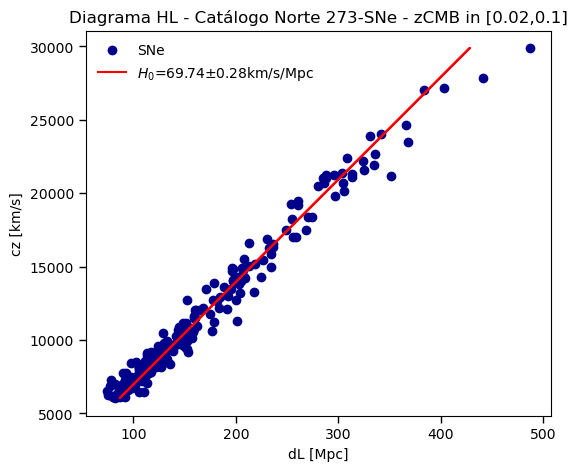

In [77]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distN7, vN7, label='SNe', color='darkblue')
plt.plot(f(zdataN7, curveN7[0]), vN7, color='red', label='$H_{0}$='+str(H0N7)+'$\pm$'+str(H0N7_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Norte 273-SNe - zCMB in [0.02,0.1]')
plt.show()

In [23]:
dataS1 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.06)]
dataS2 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.1)]
dataS3 = dataS[(dataS['zCMB']>=0.001)&(dataS['zCMB']<=0.2)]
dataS4 = dataS[(dataS['zCMB']>=0.01)&(dataS['zCMB']<=0.06)]
dataS5 = dataS[(dataS['zCMB']>=0.015)&(dataS['zCMB']<=0.065)]
dataS6 = dataS[(dataS['zCMB']>=0.01)&(dataS['zCMB']<=0.1)]
dataS7 = dataS[(dataS['zCMB']>=0.02)&(dataS['zCMB']<=0.1)]

In [24]:
zdataS1 = dataS1['zCMB']
zedataS1 = dataS1['zCMBERR']

mudataS1 = dataS1['MU_SH0ES']
muedataS1 = dataS1['MU_SH0ES_ERR_DIAG']

radataS1 = dataS1['RA']
decdataS1 = dataS1['DEC']

In [78]:
#Distância
expS1 = (mudataS1-25)/5
distS1 = np.power(10, expS1)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS1 = c*zdataS1

In [92]:
curveS1, coveS1 = curve_fit(f, zdataS1, distS1, method='trf')
covS1 = np.array(np.sqrt(np.diag(coveS1)))

In [106]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S1 = np.around(curveS1[0], 2)
H0S1_err = float(np.around(covS1[0], 2))

In [91]:
len(dataS1)

298

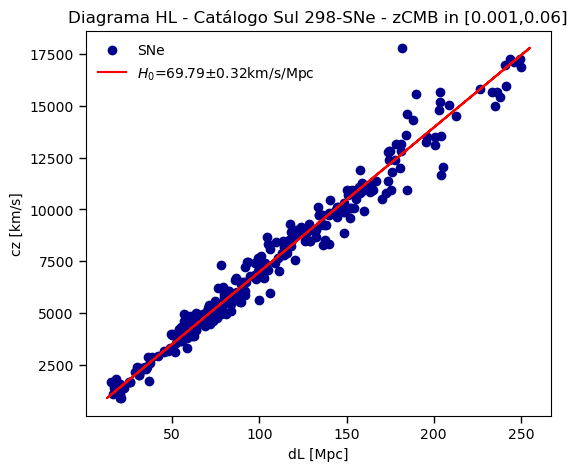

In [119]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS1, vS1, label='SNe', color='darkblue')
plt.plot(f(zdataS1, curveS1[0]), vS1, color='red', label='$H_{0}$='+str(H0S1)+'$\pm$'+str(H0S1_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 298-SNe - zCMB in [0.001,0.06]')
plt.show()

In [25]:
zdataS2 = dataS2['zCMB']
zedataS2 = dataS2['zCMBERR']

mudataS2 = dataS2['MU_SH0ES']
muedataS2 = dataS2['MU_SH0ES_ERR_DIAG']

radataS2 = dataS2['RA']
decdataS2 = dataS2['DEC']

In [79]:
#Distância
expS2 = (mudataS2-25)/5
distS2 = np.power(10, expS2)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS2 = c*zdataS2

In [93]:
curveS2, coveS2 = curve_fit(f, zdataS2, distS2, method='trf')
covS2 = np.array(np.sqrt(np.diag(coveS2)))

In [99]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S2 = np.around(curveS2[0], 2)
H0S2_err = float(np.around(covS2[0], 2))

In [90]:
len(dataS2)

329

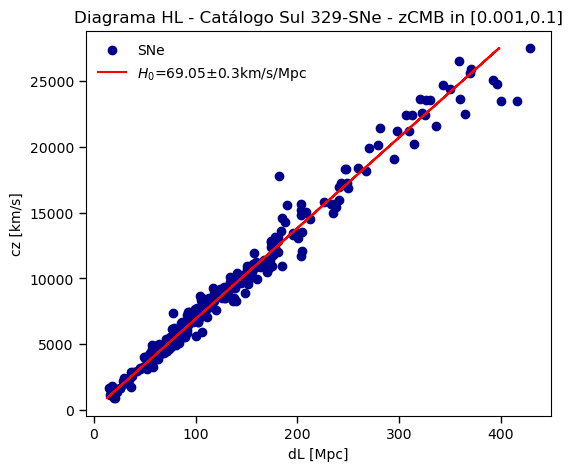

In [118]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS2, vS2, label='SNe', color='darkblue')
plt.plot(f(zdataS2, curveS2[0]), vS2, color='red', label='$H_{0}$='+str(H0S2)+'$\pm$'+str(H0S2_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 329-SNe - zCMB in [0.001,0.1]')
plt.show()

In [26]:
zdataS3 = dataS3['zCMB']
zedataS3 = dataS3['zCMBERR']

mudataS3 = dataS3['MU_SH0ES']
muedataS3 = dataS3['MU_SH0ES_ERR_DIAG']

radataS3 = dataS3['RA']
decdataS3 = dataS3['DEC']

In [80]:
#Distância
expS3 = (mudataS3-25)/5
distS3 = np.power(10, expS3)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS3 = c*zdataS3

In [94]:
curveS3, coveS3 = curve_fit(f, zdataS3, distS3, method='trf')
covS3 = np.array(np.sqrt(np.diag(coveS3)))

In [100]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S3 = np.around(curveS3[0], 2)
H0S3_err = float(np.around(covS3[0], 2))

In [89]:
len(dataS3)

510

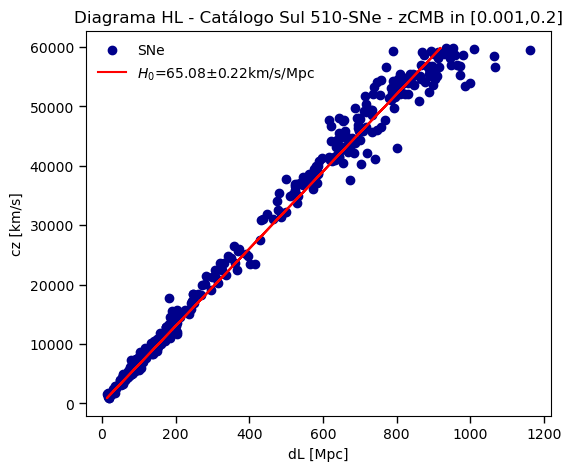

In [117]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS3, vS3, label='SNe', color='darkblue')
plt.plot(f(zdataS3, curveS3[0]), vS3, color='red', label='$H_{0}$='+str(H0S3)+'$\pm$'+str(H0S3_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 510-SNe - zCMB in [0.001,0.2]')
plt.show()

In [27]:
zdataS4 = dataS4['zCMB']
zedataS4 = dataS4['zCMBERR']

mudataS4 = dataS4['MU_SH0ES']
muedataS4 = dataS4['MU_SH0ES_ERR_DIAG']

radataS4 = dataS4['RA']
decdataS4 = dataS4['DEC']

In [81]:
#Distância
expS4 = (mudataS4-25)/5
distS4 = np.power(10, expS4)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS4 = c*zdataS4

In [95]:
curveS4, coveS4 = curve_fit(f, zdataS4, distS4, method='trf')
covS4 = np.array(np.sqrt(np.diag(coveS4)))

In [101]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S4 = np.around(curveS4[0], 2)
H0S4_err = float(np.around(covS4[0], 2))

In [88]:
len(dataS4)

260

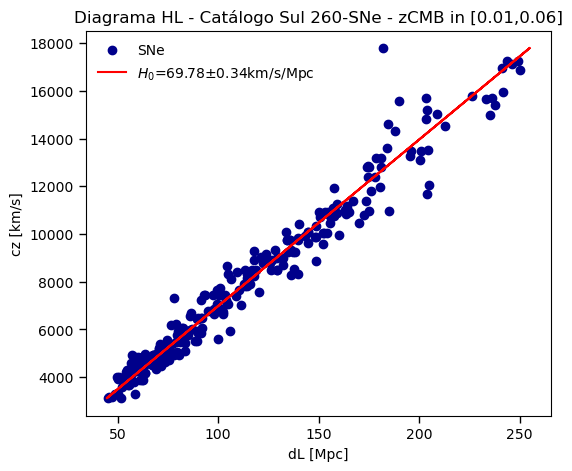

In [116]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS4, vS4, label='SNe', color='darkblue')
plt.plot(f(zdataS4, curveS4[0]), vS4, color='red', label='$H_{0}$='+str(H0S4)+'$\pm$'+str(H0S4_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 260-SNe - zCMB in [0.01,0.06]')
plt.show()

In [28]:
zdataS5 = dataS5['zCMB']
zedataS5 = dataS5['zCMBERR']

mudataS5 = dataS5['MU_SH0ES']
muedataS5 = dataS5['MU_SH0ES_ERR_DIAG']

radataS5 = dataS5['RA']
decdataS5 = dataS5['DEC']

In [82]:
#Distância
expS5 = (mudataS5-25)/5
distS5 = np.power(10, expS5)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS5 = c*zdataS5

In [96]:
curveS5, coveS5 = curve_fit(f, zdataS5, distS5, method='trf')
covS5 = np.array(np.sqrt(np.diag(coveS5)))

In [102]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S5 = np.around(curveS5[0], 2)
H0S5_err = float(np.around(covS5[0], 2))

In [87]:
len(dataS5)

228

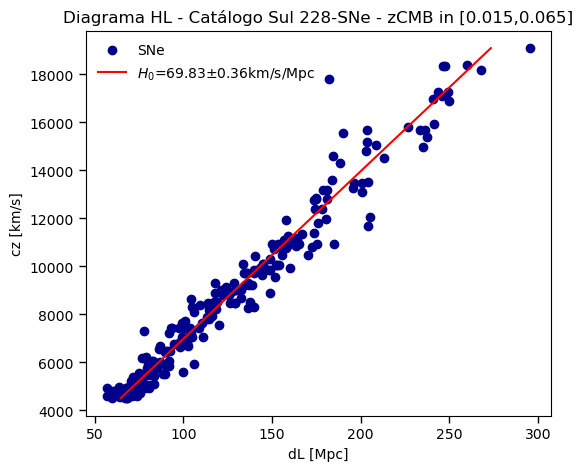

In [115]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS5, vS5, label='SNe', color='darkblue')
plt.plot(f(zdataS5, curveS5[0]), vS5, color='red', label='$H_{0}$='+str(H0S5)+'$\pm$'+str(H0S5_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 228-SNe - zCMB in [0.015,0.065]')
plt.show()

In [29]:
zdataS6 = dataS6['zCMB']
zedataS6 = dataS6['zCMBERR']

mudataS6 = dataS6['MU_SH0ES']
muedataS6 = dataS6['MU_SH0ES_ERR_DIAG']

radataS6 = dataS6['RA']
decdataS6 = dataS6['DEC']

In [83]:
#Distância
expS6 = (mudataS6-25)/5
distS6 = np.power(10, expS6)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS6 = c*zdataS6

In [97]:
curveS6, coveS6 = curve_fit(f, zdataS6, distS6, method='trf')
covS6 = np.array(np.sqrt(np.diag(coveS6)))

In [103]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S6 = np.around(curveS6[0], 2)
H0S6_err = float(np.around(covS6[0], 2))

In [86]:
len(dataS6)

291

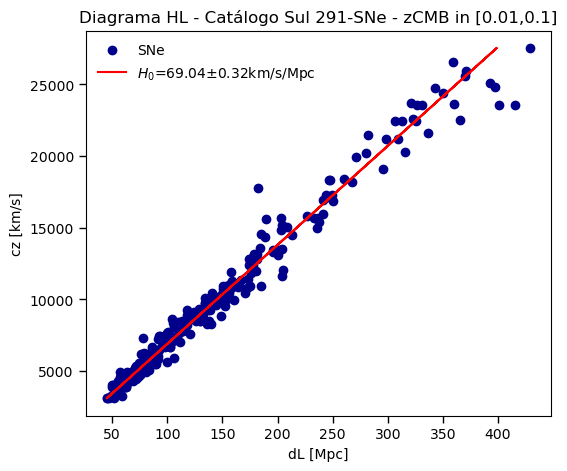

In [113]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS6, vS6, label='SNe', color='darkblue')
plt.plot(f(zdataS6, curveS6[0]), vS6, color='red', label='$H_{0}$='+str(H0S6)+'$\pm$'+str(H0S6_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 291-SNe - zCMB in [0.01,0.1]')
plt.show()

In [30]:
zdataS7 = dataS7['zCMB']
zedataS7 = dataS7['zCMBERR']

mudataS7 = dataS7['MU_SH0ES']
muedataS7 = dataS7['MU_SH0ES_ERR_DIAG']

radataS7 = dataS7['RA']
decdataS7 = dataS7['DEC']

In [84]:
#Distância
expS7 = (mudataS7-25)/5
distS7 = np.power(10, expS7)
#calcular a propagação de erro

#velocidade de recessão Lei de Hubble
c = const.c.decompose().to('km/s').value
vS7 = c*zdataS7

In [98]:
curveS7, coveS7 = curve_fit(f, zdataS7, distS7, method='trf')
covS7 = np.array(np.sqrt(np.diag(coveS7)))

In [104]:
#Vou definir H0 e o erro de H0 arredondando para duas casas decimais
H0S7 = np.around(curveS7[0], 2)
H0S7_err = float(np.around(covS7[0], 2))

In [85]:
len(dataS7)

193

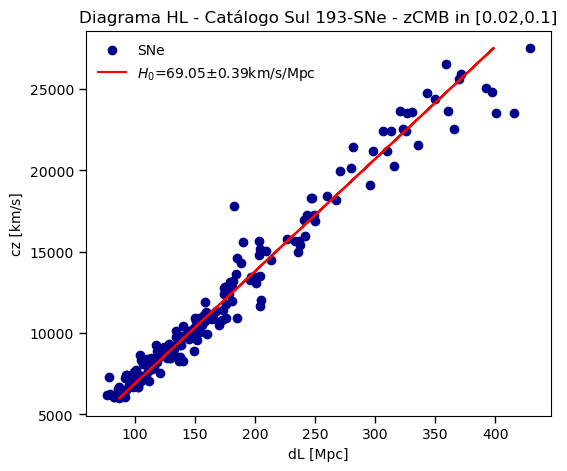

In [114]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(distS7, vS7, label='SNe', color='darkblue')
plt.plot(f(zdataS7, curveS7[0]), vS7, color='red', label='$H_{0}$='+str(H0S7)+'$\pm$'+str(H0S7_err)+'km/s/Mpc')
plt.xlabel("dL [Mpc]", fontsize=10)
plt.ylabel("cz [km/s]", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
plt.legend(fontsize=10, frameon=False)
plt.title('Diagrama HL - Catálogo Sul 193-SNe - zCMB in [0.02,0.1]')
plt.show()